In [11]:
import pandas as pd
import numpy as np
import geopandas as gpd
import fiona
# from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt 
# import folium
# import plotly_express as px

In [4]:
url = https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-data.html

In [4]:
path = "ACS_2019_5YR_TRACT_25.gdb.zip"
fiona.listlayers(path)

['X01_AGE_AND_SEX',
 'X02_RACE',
 'X03_HISPANIC_OR_LATINO_ORIGIN',
 'X04_ANCESTRY',
 'X05_FOREIGN_BORN_CITIZENSHIP',
 'X06_PLACE_OF_BIRTH',
 'X07_MIGRATION',
 'X08_COMMUTING',
 'X09_CHILDREN_HOUSEHOLD_RELATIONSHIP',
 'X10_GRANDPARENTS_GRANDCHILDREN',
 'X11_HOUSEHOLD_FAMILY_SUBFAMILIES',
 'X12_MARITAL_STATUS_AND_HISTORY',
 'X13_FERTILITY',
 'X14_SCHOOL_ENROLLMENT',
 'X15_EDUCATIONAL_ATTAINMENT',
 'X16_LANGUAGE_SPOKEN_AT_HOME',
 'X17_POVERTY',
 'X18_DISABILITY',
 'X19_INCOME',
 'X20_EARNINGS',
 'X21_VETERAN_STATUS',
 'X22_FOOD_STAMPS',
 'X23_EMPLOYMENT_STATUS',
 'X25_HOUSING_CHARACTERISTICS',
 'X27_HEALTH_INSURANCE',
 'X28_COMPUTER_AND_INTERNET_USE',
 'X29_VOTING_AGE_POPULATION',
 'X99_IMPUTATION',
 'X24_INDUSTRY_OCCUPATION',
 'X26_GROUP_QUARTERS',
 'TRACT_METADATA_2019',
 'ACS_2019_5YR_TRACT_25_MASSACHUSETTS']

In [79]:
df = gpd.read_file(path,layer='ACS_2019_5YR_TRACT_25_MASSACHUSETTS')
df_meta = gpd.read_file(path,layer='TRACT_METADATA_2019')
df_demo = gpd.read_file(path,layer='X01_AGE_AND_SEX')
df_income = gpd.read_file(path,layer='X19_INCOME')

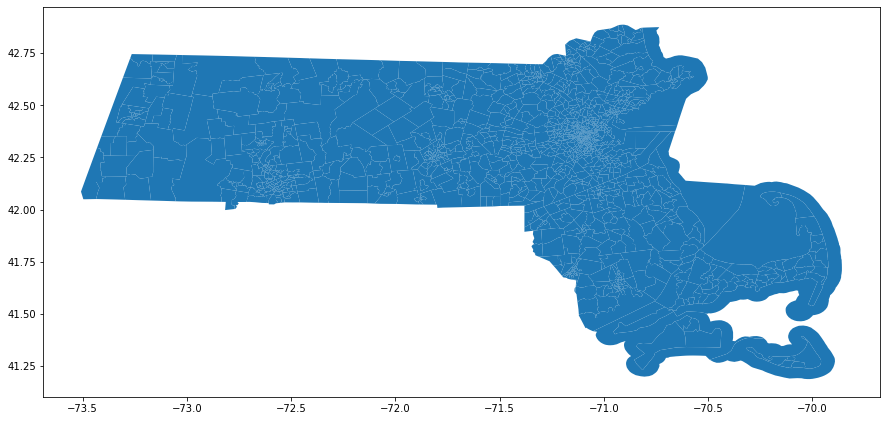

In [13]:
fig,ax = plt.subplots(figsize=(15,10))
df.plot(ax=ax)

plt.show()

In [14]:
df.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Length,Shape_Area,GEOID_Data,geometry
0,25,027,724100,25027724100,7241,Census Tract 7241,G5020,S,53031300.0,1639215.0,+42.2566908,-072.1581690,0.443205,0.005964,14000US25027724100,"MULTIPOLYGON (((-72.21782 42.27018, -72.21765 ..."
1,25,027,759100,25027759100,7591,Census Tract 7591,G5020,S,25548737.0,1449315.0,+42.2096822,-072.0401777,0.263048,0.002943,14000US25027759100,"MULTIPOLYGON (((-72.07888 42.21475, -72.07880 ..."
2,25,001,012601,25001012601,126.01,Census Tract 126.01,G5020,S,3467387.0,9794.0,+41.6624989,-070.3180404,0.102990,0.000376,14000US25001012601,"MULTIPOLYGON (((-70.34011 41.65738, -70.33993 ..."
3,25,025,170501,25025170501,1705.01,Census Tract 1705.01,G5020,S,955798.0,593136.0,+42.4150328,-070.9902217,0.063346,0.000169,14000US25025170501,"MULTIPOLYGON (((-71.00017 42.40962, -70.99989 ..."
4,25,027,709701,25027709701,7097.01,Census Tract 7097.01,G5020,S,4528209.0,138136.0,+42.5450353,-071.7748626,0.124442,0.000511,14000US25027709701,"MULTIPOLYGON (((-71.79318 42.55170, -71.79318 ..."


In [81]:
df_demo.columns

Index(['GEOID', 'B01001e1', 'B01001m1', 'B01001e2', 'B01001m2', 'B01001e3',
       'B01001m3', 'B01001e4', 'B01001m4', 'B01001e5',
       ...
       'B01002Hm3', 'B01002Ie1', 'B01002Im1', 'B01002Ie2', 'B01002Im2',
       'B01002Ie3', 'B01002Im3', 'B01003e1', 'B01003m1', 'geometry'],
      dtype='object', length=720)

In [113]:
(
    df_meta
    .loc[:,['Short_Name', 'Full_Name']] # ignored columns: ,'geometry'

    # r'e1$' for (Estimate) 
    # r'm1$' for (Margin of Error)
    # .loc[(df_meta.Short_Name.str.match(r'^B190..e1$'))] ## Income related columns 
    .loc[(df_meta.Short_Name.str.match(r'^B010..e26$'))] ## Demography related columns 
    # .loc[(df_meta.Short_Name.str.match(r'^B010...e.'))] ## Income related columns 

    .set_index('Short_Name')
    .Full_Name
    .to_dict()
)

{'B01001e26': 'SEX BY AGE: Female: Total population -- (Estimate)'}

In [124]:
(
    df_meta
    .loc[:,['Short_Name', 'Full_Name']] # ignored columns: ,'geometry'

    # r'e1$' for (Estimate) 
    # r'm1$' for (Margin of Error)
    # .loc[(df_meta.Short_Name.str.match(r'^B190..e1$'))] ## Income related columns 
    .loc[(df_meta.Short_Name.str.match(
        r"^(B19001e1|B19052e1|B01001e1|B01001e2|B01001e26)$"
        ))] ## Demography related columns 
    # .loc[(df_meta.Short_Name.str.match(r'^B010...e.'))] ## Income related columns 

    .set_index('Short_Name')
    .Full_Name
    .to_dict()
)

{'B01001e1': 'SEX BY AGE: Total: Total population -- (Estimate)',
 'B01001e2': 'SEX BY AGE: Male: Total population -- (Estimate)',
 'B01001e26': 'SEX BY AGE: Female: Total population -- (Estimate)',
 'B19001e1': 'HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS): Total: Households -- (Estimate)',
 'B19052e1': 'WAGE OR SALARY INCOME IN THE PAST 12 MONTHS FOR HOUSEHOLDS: Total: Households -- (Estimate)'}

In [115]:
(
    # df_income.loc[:,['GEOID','B19001e1','B19052e1']]
    df_demo.loc[:,['GEOID','B01001e1','B01001e2','B01001e26']] 
    .set_index('GEOID')
    # .corr()
)

,B01001e1,B01001e2,B01001e26
GEOID,,,
14000US25001010100,2973.0,1725.0,1248.0
14000US25001010206,3617.0,1579.0,2038.0
14000US25001010208,1122.0,604.0,518.0
14000US25001010304,2394.0,1173.0,1221.0
14000US25001010306,2507.0,1092.0,1415.0
...,...,...,...
14000US25027760100,3441.0,1700.0,1741.0
14000US25027761100,5213.0,2286.0,2927.0
14000US25027761200,5506.0,2727.0,2779.0


In [131]:
def map(df,col):
    fig,ax = plt.subplots(figsize=(15,10))
    df.plot(
        ax=ax
        ,columns=col
        ,cmap='RdYlGn'
        ,scheme='QUANTILES', k=5
        # ,legend=False
        ,alpha=0.6
    )

    plt.show()

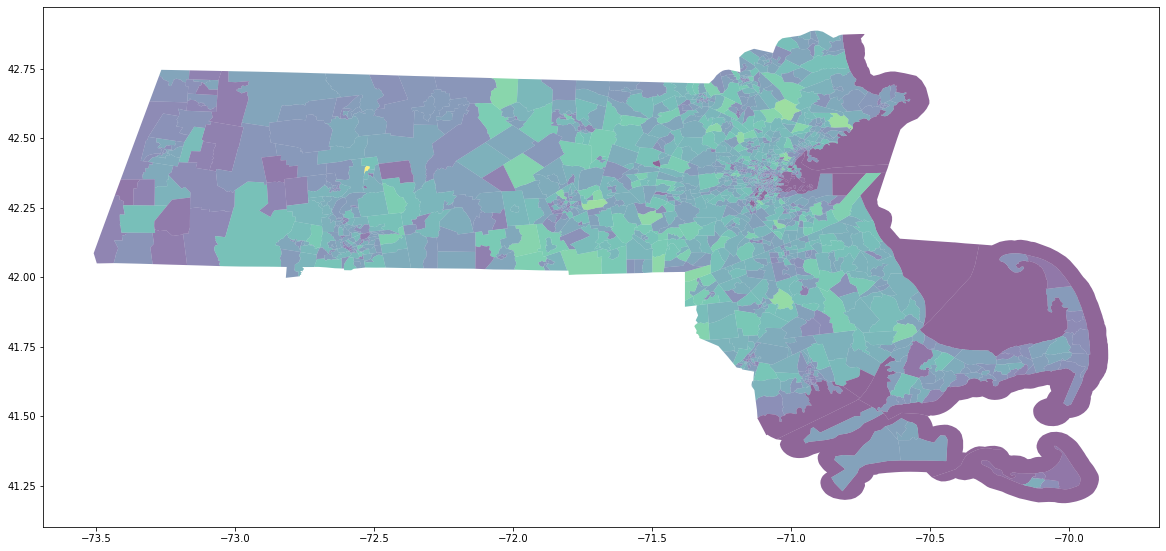

In [141]:
cols = ['B01001e1']
# cols = [
#     'B01001e1'
#     ,'B01001e2'
#     ,'B01001e26'
#     ,'B01001e1'
#     ,'B01001e2'
#     ,'B01001e26'
#     ]


fig,ax = plt.subplots(figsize=(20,10))
(
    df
## INCOME
    # .merge(
    #     df_income.loc[:,['GEOID','B19001e1','B19052e1']].set_index('GEOID')
    #     , left_on='GEOID_Data', right_index=True
    #     ,how='left'
    # )
## POPULATION
    .merge(
        df_demo.loc[:,['GEOID','B01001e1','B01001e2','B01001e26']].set_index('GEOID')
        , left_on='GEOID_Data', right_index=True
        ,how='left'
    )
    # .groupby('COUNTYFP')[cols].sum()
    # .sum()
    # .pipe(cols)
    .plot(
        ax=ax
        ,column=cols
        # ,cmap='RdYlGn'
        # ,scheme='QUANTILES', k=5
        # ,legend=False
        ,alpha=0.6
    )

)
plt.show()

In [ ]:
modelo.plot(ax=ax,cax=cax,
               column=variable,
               marker='.',
               markersize=7,
               cmap='RdYlGn',
               scheme='QUANTILES', k=5,
               legend=False, alpha=0.6)